<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

# Python for Finance Course

**Module 1 &mdash; Financial Data**

[team@tpq.io](mailto:team@tpq.io) | [http://tpq.io](http://tpq.io)

The Python Quants GmbH

## Requirements

Make sure to have installed locally a **comprehensive Python installation** like the [Anaconda](http://continuum.io/downloads) Python distribution.

Alternatively, and more easily, register on the **[Quant Platform](http://pqp.io)** where you can execute this Jupyter Notebook file in the browser. After registration, you find all Jupyter Notebook files of this course in the folder `pffcourse`.

## Necessary Imports

Working with Python in general requires you to **import certain modules/packages** from the standard library or from the so-called scientific or PyData stack (i.e. from third parties).

In [1]:
import numpy as np  # array operations
import pandas as pd  # time series management
from pandas_datareader import data as web  # data retrieval
import seaborn as sns; sns.set()  # nicer plotting style
# put all plots in the notebook itself
%matplotlib inline

## Retrieving Stock Price Data

We retrieve **stock price data for Apple** from Yahoo! Finance.

In [2]:
AAPL = web.DataReader('AAPL', data_source='yahoo')

The `AAPL` object is of **type** `DataFrame`.

In [3]:
type(AAPL)

pandas.core.frame.DataFrame

`DataFrame` objects provide a **wealth of (convenience) methods**.

In [4]:
AAPL.info()  # meta information

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1751 entries, 2010-01-04 to 2016-12-14
Data columns (total 6 columns):
Open         1751 non-null float64
High         1751 non-null float64
Low          1751 non-null float64
Close        1751 non-null float64
Volume       1751 non-null int64
Adj Close    1751 non-null float64
dtypes: float64(5), int64(1)
memory usage: 95.8 KB


## Working with the Data

Let us inspect the **final five rows** of the data set.

In [5]:
AAPL.tail()  # final five rows

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-12-08,110.860001,112.430000,110.599998,112.120003,26818500,112.120003
2016-12-09,112.309998,114.699997,112.309998,113.949997,34274100,113.949997
2016-12-12,113.290001,115.000000,112.489998,113.300003,26149100,113.300003
2016-12-13,113.839996,115.919998,113.750000,115.190002,43167500,115.190002
2016-12-14,115.040001,116.199997,114.980003,115.190002,33433200,115.190002


You can easily **select single or multiple columns** of a `DataFrame` object.

In [6]:
AAPL['Adj Close'].head()  # first five rows of single column

Date
2010-01-04    27.847252
2010-01-05    27.895396
2010-01-06    27.451683
2010-01-07    27.400936
2010-01-08    27.583106
Name: Adj Close, dtype: float64

In [7]:
AAPL[['Open', 'Close']].tail()  # last five rows of 2 columns

,Open,Close
Date,,
2016-12-08,110.860001,112.120003
2016-12-09,112.309998,113.949997
2016-12-12,113.290001,113.300003
2016-12-13,113.839996,115.190002
2016-12-14,115.040001,115.190002


Similarly, you can select **single or multiple rows**.

In [8]:
AAPL.loc['2016-04-05']  # single row via index value

Open         1.095100e+02
High         1.107300e+02
Low          1.094200e+02
Close        1.098100e+02
Volume       2.657870e+07
Adj Close    1.080029e+02
Name: 2016-04-05 00:00:00, dtype: float64

In [9]:
AAPL.iloc[:2]  # two rows via index numbers

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,213.429998,214.499996,212.380001,214.009998,123432400,27.847252
2010-01-05,214.599998,215.589994,213.249994,214.379993,150476200,27.895396


## Data Visualization

There is also a powerful **method for plotting**.

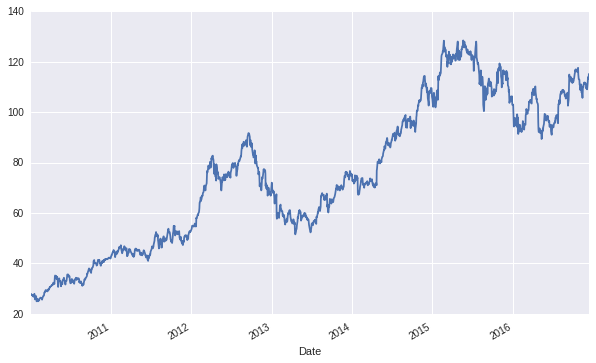

In [10]:
AAPL['Adj Close'].plot(figsize=(10, 6));

Let us calculate the Apple stock price **log returns**.

In [11]:
# fully vectorized operation for log return calculation
rets = np.log(AAPL['Adj Close'] / AAPL['Adj Close'].shift(1))

The log returns can then be visualized via a **histogram**.

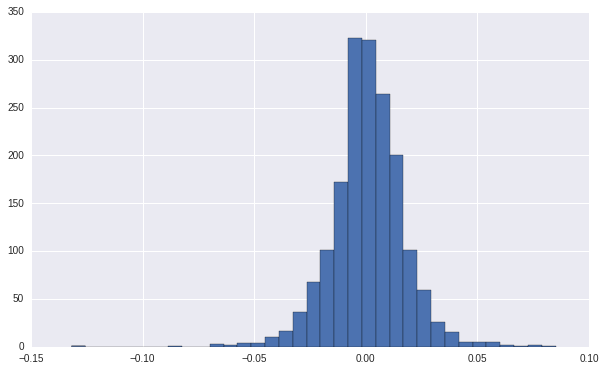

In [12]:
rets.hist(figsize=(10, 6), bins=35);

## Calculating a Moving Average

pandas provides, among others, convenience functions for the calculation of **moving averages**.

In [13]:
# fully vectorized calculation of 50 days moving average/trend
AAPL['MA50'] = pd.rolling_mean(AAPL['Adj Close'], window=50)

/home/anaconda/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=50,center=False).mean()
  from ipykernel import kernelapp as app


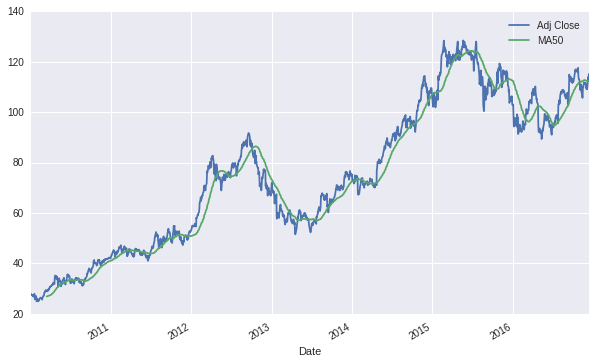

In [14]:
AAPL[['Adj Close', 'MA50']].plot(figsize=(10, 6));

## Closing Remarks

This closes the first module of the Python for Finance email course. In this module, you have learned:

* how to retrieve stock price data with pandas (datareader)
* how to look up information about and data stored in a `DataFrame` object
* how to select columns and rows from a `DataFrame` object
* how to visulize data stored in a `DataFrame` object
* how to do vectorized calculations with `DataFrame` objects (log returns, moving average)

What you have learned today builds the basis for many important use cases for Python in Finance.

## Exercises

In order to master the material of this module, do the following:

* replace Apple by another symbol, eg. `MSFT`, `YHOO`, `^GSPC`
* read the documentation for `DataReader` under http://pandas.pydata.org/pandas-docs/stable/remote_data.html
* read the **10 Minutes to pandas** tutorial under http://pandas.pydata.org/pandas-docs/stable/10min.html
* discover plotting options under http://pandas.pydata.org/pandas-docs/stable/visualization.html
* calculate other statics with e.g. `pd.rolling_std` or `pd.rolling_max`
* discover more computational tools of pandas under http://pandas.pydata.org/pandas-docs/stable/computation.html

## References

You find background information for the topics covered in this module in the following books:

* Hilpisch, Yves (2014): _Python for Finance_. O'Reilly, ch. 6.
* McKinney, Wes (2012): _Python for Data Analysis_. O'Reilly.

<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

<a href="http://tpq.io" target="_blank">http://tpq.io</a> | <a href="http://twitter.com/dyjh" target="_blank">@dyjh</a> | <a href="mailto:team@tpq.io">team@tpq.io</a>

**Quant Platform** |
<a href="http://quant-platform.com">http://quant-platform.com</a>

**Python for Finance** |
<a href="http://python-for-finance.com" target="_blank">Python for Finance @ O'Reilly</a>

**Derivatives Analytics with Python** |
<a href="http://derivatives-analytics-with-python.com" target="_blank">Derivatives Analytics @ Wiley Finance</a>

**Listed Volatility and Variance Derivatives** |
<a href="http://lvvd.tpq.io" target="_blank">Listed VV Derivatives @ Wiley Finance</a>